In [52]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  1., 10.,  3.,  1.,  1.,  1.,  0.,  1.,  1.,
         0.,  1.,  1.,  0.,  1.,  1.]),
 array([ 5967.     ,  8753.40625, 11539.8125 , 14326.21875, 17112.625  ,
        19899.03125, 22685.4375 , 25471.84375, 28258.25   , 31044.65625,
        33831.0625 , 36617.46875, 39403.875  , 42190.28125, 44976.6875 ,
        47763.09375, 50549.5    , 53335.90625, 56122.3125 , 58908.71875,
        61695.125  , 64481.53125, 67267.9375 , 70054.34375, 72840.75   ,
        75627.15625, 78413.5625 , 81199.96875, 83986.375  , 86772.78125,
        89559.1875 , 92345.59375, 95132.     ]),
 <BarContainer object of 32 artists>)

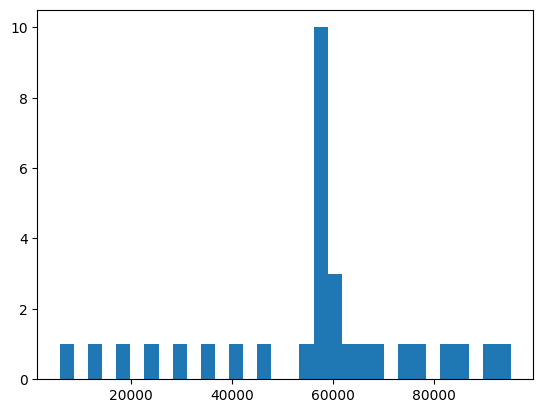

In [28]:
bds = np.load("../Prop_Notebooks/edh_boundaries.npy")
plt.hist(bds[1, :], bins=32)

In [41]:
bds[1, :]

array([ 5967, 11934, 17901, 23868, 29835, 35802, 41770, 47737, 53704,
       56634, 57120, 57418, 57653, 57857, 58047, 58232, 58420, 58620,
       58844, 59118, 59519, 60661, 63817, 66356, 69568, 73351, 77467,
       81858, 86490, 90595, 95132])

In [49]:
bd1_hist = np.histogram(bds[1, :], bins=16)
bd1_hist

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, 13,  2,  1,  2,  1,  1,  2]),
 array([ 5967.    , 11539.8125, 17112.625 , 22685.4375, 28258.25  ,
        33831.0625, 39403.875 , 44976.6875, 50549.5   , 56122.3125,
        61695.125 , 67267.9375, 72840.75  , 78413.5625, 83986.375 ,
        89559.1875, 95132.    ]))

In [50]:
print(f'{len(bd1_hist[0])} | {len(bd1_hist[1])}')

16 | 17


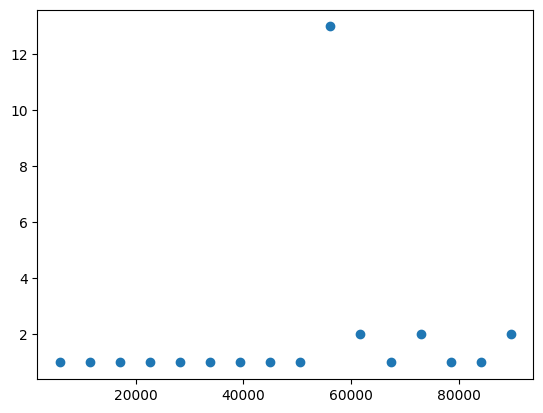

In [51]:
plt.scatter(bd1_hist[1][:-1], bd1_hist[0])

In [54]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(bd1_hist[1][:-1].reshape(-1, 1), bd1_hist[0])
gaussian_process.kernel_

3.47**2 * RBF(length_scale=22.2)

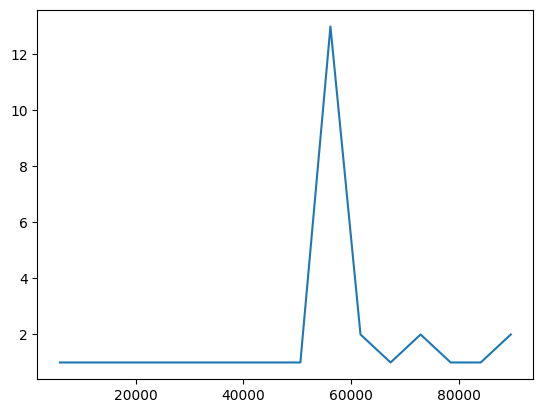

In [58]:
plt.plot(bd1_hist[1][:-1], gaussian_process.predict(bd1_hist[1][:-1].reshape(-1, 1)))